In [1]:
# imports
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import numpy as np
import dateutil.parser as parser
from scipy.fft import fft, fftfreq
import json
import matplotlib.pyplot as plt
%matplotlib inline

load_dotenv()


True

In [19]:
# get data from API
PERSONAL_TOKEN = os.getenv("PERSONAL_TOKEN")

url = "https://api.esios.ree.es/indicators/1293"
headers = {'x-api-key': PERSONAL_TOKEN}
params = {"start_date":parser.parse("2018-09-02").isoformat(), "end_date":parser.parse("2018-10-06").isoformat(), "time_trunc":"hour"}

response = requests.get(url ,params=params , headers=headers)

In [20]:
# see data
data = response.json()
data

{'indicator': {'name': 'Demanda real',
  'short_name': 'Demanda real',
  'id': 1293,
  'composited': False,
  'step_type': 'linear',
  'disaggregated': False,
  'magnitud': [{'name': 'Potencia', 'id': 20}],
  'tiempo': [{'name': 'Diez minutos', 'id': 225}],
  'geos': [{'geo_id': 8741, 'geo_name': 'Península'}],
  'values_updated_at': '2018-10-06T00:09:00.000+02:00',
  'values': [{'value': 157587.0,
    'datetime': '2018-09-02T00:00:00.000+02:00',
    'datetime_utc': '2018-09-01T22:00:00Z',
    'tz_time': '2018-09-01T22:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 149121.0,
    'datetime': '2018-09-02T01:00:00.000+02:00',
    'datetime_utc': '2018-09-01T23:00:00Z',
    'tz_time': '2018-09-01T23:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 141853.0,
    'datetime': '2018-09-02T02:00:00.000+02:00',
    'datetime_utc': '2018-09-02T00:00:00Z',
    'tz_time': '2018-09-02T00:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Penínsu

In [22]:
# convert data to dataframe format
data = data["indicator"]
df = pd.json_normalize(data, record_path= ["values"])
df

,value,datetime,datetime_utc,tz_time,geo_id,geo_name
0,157587.0,2018-09-02T00:00:00.000+02:00,2018-09-01T22:00:00Z,2018-09-01T22:00:00.000Z,8741,Península
1,149121.0,2018-09-02T01:00:00.000+02:00,2018-09-01T23:00:00Z,2018-09-01T23:00:00.000Z,8741,Península
2,141853.0,2018-09-02T02:00:00.000+02:00,2018-09-02T00:00:00Z,2018-09-02T00:00:00.000Z,8741,Península
3,137574.0,2018-09-02T03:00:00.000+02:00,2018-09-02T01:00:00Z,2018-09-02T01:00:00.000Z,8741,Península
4,133945.0,2018-09-02T04:00:00.000+02:00,2018-09-02T02:00:00Z,2018-09-02T02:00:00.000Z,8741,Península
...,...,...,...,...,...,...
812,191998.0,2018-10-05T20:00:00.000+02:00,2018-10-05T18:00:00Z,2018-10-05T18:00:00.000Z,8741,Península
813,187566.0,2018-10-05T21:00:00.000+02:00,2018-10-05T19:00:00Z,2018-10-05T19:00:00.000Z,8741,Península
814,172629.0,2018-10-05T22:00:00.000+02:00,2018-10-05T20:00:00Z,2018-10-05T20:00:00.000Z,8741,Península
815,159940.0,2018-10-05T23:00:00.000+02:00,2018-10-05T21:00:00Z,2018-10-05T21:00:00.000Z,8741,Península


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         817 non-null    float64
 1   datetime      817 non-null    object 
 2   datetime_utc  817 non-null    object 
 3   tz_time       817 non-null    object 
 4   geo_id        817 non-null    int64  
 5   geo_name      817 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 38.4+ KB


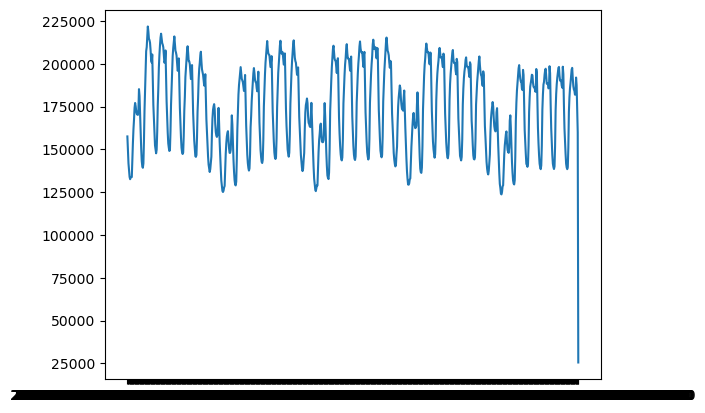

In [24]:
# plot demand in time
plt.plot(df["datetime"], df["value"])

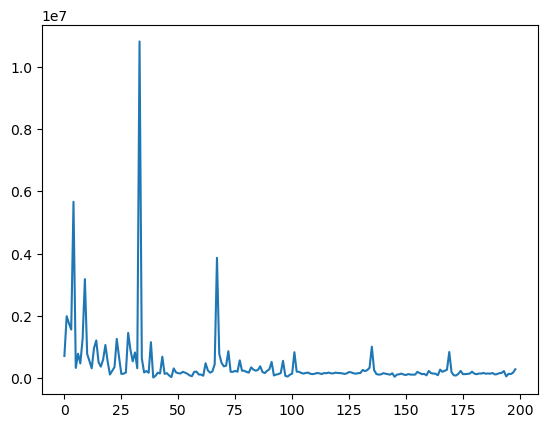

In [25]:
# apply Fast Fourier Transform

yf = fft(df["value"].to_numpy())


plt.plot(np.abs(yf)[1:200])
plt.show()